In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

In [199]:
qc_covid_data = pd.read_json("https://www.donneesquebec.ca/recherche/api/3/action/datastore_search?resource_id=d2cf4211-5400-46a3-9186-a81e6cd41de9&limit=1000")
qc_covid_data.head(10)

,help,success,result
_links,https://www.donneesquebec.ca/recherche/api/3/a...,True,{'start': '/api/3/action/datastore_search?limi...
fields,https://www.donneesquebec.ca/recherche/api/3/a...,True,"[{'type': 'int', 'id': '_id'}, {'type': 'text'..."
include_total,https://www.donneesquebec.ca/recherche/api/3/a...,True,True
limit,https://www.donneesquebec.ca/recherche/api/3/a...,True,1000
records,https://www.donneesquebec.ca/recherche/api/3/a...,True,"[{'_id': 1, 'Date': 'Date inconnue', 'Nb_Cas_C..."
records_format,https://www.donneesquebec.ca/recherche/api/3/a...,True,objects
resource_id,https://www.donneesquebec.ca/recherche/api/3/a...,True,d2cf4211-5400-46a3-9186-a81e6cd41de9
total,https://www.donneesquebec.ca/recherche/api/3/a...,True,693


In [200]:
# skipping the first record because it has a "date inconnue" bug
valid_records = qc_covid_data["result"]["records"][1:]
valid_records

[{'_id': 2,
  'Date': '2020-01-23',
  'Nb_Cas_Cumulatif': '0',
  'Nb_Nvx_Cas': '0',
  'Nb_Cas_Actifs': '0',
  'Nb_Deces_Cumulatif_Total': '0',
  'Nb_Deces_Cumulatif_CHCHSLD': '0',
  'Nb_Deces_Cumulatif_RPA': '0',
  'Nb_Deces_Cumulatif_DomInc': '0',
  'Nb_Deces_Cumulatif_Autre': '0',
  'Nb_Nvx_Deces_Total': '0',
  'Nb_Nvx_Deces_CHCHSLD': '0',
  'Nb_Nvx_Deces_RPA': '0',
  'Nb_Nvx_Deces_DomInc': '0',
  'Nb_Nvx_Deces_Autre': '0'},
 {'_id': 3,
  'Date': '2020-01-24',
  'Nb_Cas_Cumulatif': '0',
  'Nb_Nvx_Cas': '0',
  'Nb_Cas_Actifs': '0',
  'Nb_Deces_Cumulatif_Total': '0',
  'Nb_Deces_Cumulatif_CHCHSLD': '0',
  'Nb_Deces_Cumulatif_RPA': '0',
  'Nb_Deces_Cumulatif_DomInc': '0',
  'Nb_Deces_Cumulatif_Autre': '0',
  'Nb_Nvx_Deces_Total': '0',
  'Nb_Nvx_Deces_CHCHSLD': '0',
  'Nb_Nvx_Deces_RPA': '0',
  'Nb_Nvx_Deces_DomInc': '0',
  'Nb_Nvx_Deces_Autre': '0'},
 {'_id': 4,
  'Date': '2020-01-25',
  'Nb_Cas_Cumulatif': '0',
  'Nb_Nvx_Cas': '0',
  'Nb_Cas_Actifs': '0',
  'Nb_Deces_Cumulatif_Total': 

In [201]:
# setting the format to datetime and numeric
dates, cases, deaths = list(), list(), list()
for i in range(0,len(valid_records)): 
    dates.append(pd.to_datetime(valid_records[i]["Date"]))
    cases.append(pd.to_numeric(valid_records[i]["Nb_Nvx_Cas"])) 
    deaths.append(pd.to_numeric(valid_records[i]["Nb_Nvx_Deces_Total"]))


In [202]:
data = {"date":dates, "cases":cases, "deaths":deaths}
new_cases_df = pd.DataFrame(data,columns=["date","cases","deaths"])

# let's create a color column from the values of cases
# could be interesting to try with percentiles instead of ratio of the max
def cases_to_color(cases, max_cases):
    if (cases > max_cases * 2/3): return "m"
    if (cases > max_cases * 1/2): return "r"
    if (cases > max_cases * 1/6): return "y"
    if (cases > max_cases * 1/10): return "b"
    if (cases > max_cases * 1/30): return "c" 
    return "g"

cmax = new_cases_df["deaths"].max()
new_cases_df["color"] = new_cases_df["deaths"]
new_cases_df["color"] = new_cases_df["color"].apply(lambda x: cases_to_color(x,cmax))
new_cases_df

,date,cases,deaths,color
0,2020-01-23,0,0,g
1,2020-01-24,0,0,g
2,2020-01-25,0,0,g
3,2020-01-26,0,0,g
4,2020-01-27,0,0,g
...,...,...,...,...
687,2021-12-10,2131,4,g
688,2021-12-11,1687,4,g
689,2021-12-12,1571,4,g
690,2021-12-13,2153,2,g


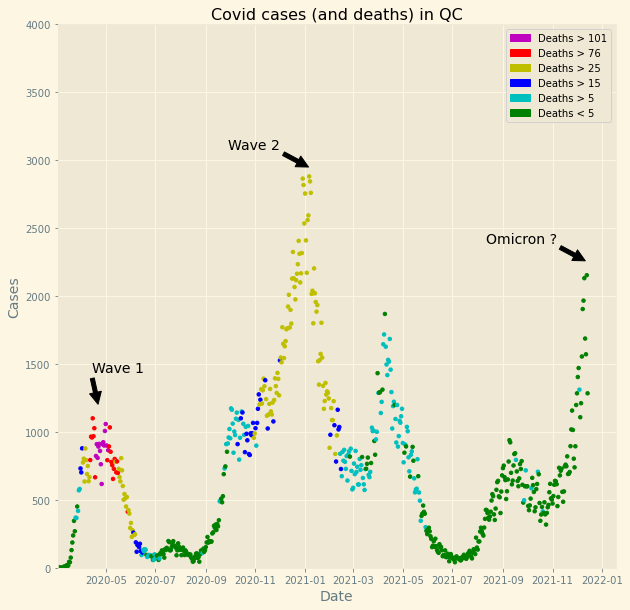

In [203]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(figsize=(10,10))
    
    ax.scatter(new_cases_df["date"],new_cases_df["cases"],c=new_cases_df["color"], s=12)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    plt.ylim(0,4000)
    plt.xlim(left=new_cases_df["date"][40])
    plt.title('Covid cases (and deaths) in QC')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Cases', fontsize=14)
    
    # anotating dates is tricky with matplotlib
    # mdates.date2num solves the issue
    ax.annotate('Wave 1', xy=(mdates.date2num(new_cases_df["date"][90]), new_cases_df["cases"][90]+300),  xycoords='data',
            xytext=(45,45), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize=14,
            )
    
    ax.annotate('Wave 2', xy=(mdates.date2num(new_cases_df["date"][350]), new_cases_df["cases"][350]+100),  xycoords='data',
            xytext=(-30,30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize=14,
            )
    
    ax.annotate('Omicron ?', xy=(mdates.date2num(new_cases_df["date"][690]), new_cases_df["cases"][690]+100),  xycoords='data',
            xytext=(-30,30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize=14,
            )
    
    magenta = mpatches.Patch(color='m', label='Deaths > ' + str(round(cmax/1.5)))
    red = mpatches.Patch(color='r', label='Deaths > ' + str(round(cmax/2)))
    yellow = mpatches.Patch(color='y', label='Deaths > '+ str(round(cmax/6)))
    green = mpatches.Patch(color='g', label='Deaths < ' + str(round(cmax/30)))
    blue = mpatches.Patch(color='b', label='Deaths > '+ str(round(cmax/10)))
    cyan = mpatches.Patch(color='c', label='Deaths > '+ str(round(cmax/30)))

    ax.legend(handles=[magenta,red,yellow,blue,cyan,green])

plt.show()